# A more visual view of data
This notebook provides a more visual overview of the data before and after cleaning. It helps you understand them so you can use them better.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from scipy.stats import norm
import numpy as np
import statsmodels.api as sm
from scipy.stats import gamma

## Displaying raw data
Display each dataset: ECFP train, CDDD data and ECFP test respectively.

In [5]:
datas_folder = "raw_datas/"
train_data_file = "train.csv"
cddd_feature_file = "cddd.csv" 
test_data_file = "test.csv"

train = pd.read_csv(datas_folder + train_data_file)
cddd_data = pd.read_csv(datas_folder + cddd_feature_file)
test = pd.read_csv(datas_folder + test_data_file)

print(train.iloc[:,:6].head) 
print("\n")
print(cddd_data.iloc[:,:6].head) 
print("\n")
print(test.iloc[:,:6].head) 

<bound method NDFrame.head of                                            Compound  \
0                                  Hydroxytriazolam   
1                                        5-MeO-DIPT   
2                                              MDMA   
3     Despropionyl N-Benzyl para-Fluoro Norfentanyl   
4                                  N-Ethylpentylone   
...                                             ...   
3495                                      Triazolam   
3496                                      Alpha-PVP   
3497                        UR-144-M (5-HO-pentyl-)   
3498  Piperazine -1((4-chlorophenyl) phenyl methyl)   
3499                                    Flephedrone   

                                         SMILES  \
0      OCc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1Cl)=NC2   
1           COc1ccc2[nH]cc(CCN(C(C)C)C(C)C)c2c1   
2                        CNC(C)Cc1ccc2c(c1)OCO2   
3               Fc1ccc(NC2CCN(Cc3ccccc3)CC2)cc1   
4                 CCCC(NCC)C(=O)c1ccc2c(c1)OCO2   
...

## Display dataset characteristics
Display the number of rows and columns in each dataset: ECFP train, CDDD data and ECFP test respectively.

In [6]:
datas = [train,cddd_data,test]
for i in datas : 
    print(f'No. of rows {i.shape[0]}, no of columns {i.shape[1]}')

No. of rows 3500, no of columns 1029
No. of rows 1486, no of columns 513
No. of rows 1375, no of columns 1028


Here we retrieve the names of the first 6 columns of each dataset: ECFP train, CDDD data and ECFP test respectively.
This makes it possible to compare them.

In [10]:
for i in datas : 
    print(i.iloc[:,:6].columns, ".....")
    print("\n")

Index(['Compound', 'SMILES', 'Lab', 'RT', 'mol', 'ECFP_1'], dtype='object') .....


Index(['SMILES', 'cddd_1', 'cddd_2', 'cddd_3', 'cddd_4', 'cddd_5'], dtype='object') .....


Index(['Compound', 'SMILES', 'Lab', 'mol', 'ECFP_1', 'ECFP_2'], dtype='object') .....




Display of DataFrame information representing each Datadataset: ECFP train, CDDD data and ECFP test respectively.

In [5]:
for i in datas : 
    print(i.info())
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Columns: 1029 entries, Compound to ECFP_1024
dtypes: float64(1), int64(1024), object(4)
memory usage: 27.5+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Columns: 513 entries, SMILES to cddd_512
dtypes: float64(512), object(1)
memory usage: 5.8+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Columns: 1028 entries, Compound to ECFP_1024
dtypes: int64(1024), object(4)
memory usage: 10.8+ MB
None




Generate descriptive statistics for all numerical columns in the DataFrame of the ECFP train dataset and the CDDD dataset respectively.

In [6]:
print(train.describe())
print("\n")
print(cddd_data.describe())

                RT       ECFP_1       ECFP_2       ECFP_3       ECFP_4  \
count  3500.000000  3500.000000  3500.000000  3500.000000  3500.000000   
mean      7.460385     0.009714     0.457429     0.074571     0.023714   
std       3.841776     0.098095     0.498256     0.262736     0.152179   
min       0.515000     0.000000     0.000000     0.000000     0.000000   
25%       4.737500     0.000000     0.000000     0.000000     0.000000   
50%       6.523500     0.000000     0.000000     0.000000     0.000000   
75%       9.550000     0.000000     1.000000     0.000000     0.000000   
max      23.210000     1.000000     1.000000     1.000000     1.000000   

            ECFP_5       ECFP_6      ECFP_7       ECFP_8       ECFP_9  ...  \
count  3500.000000  3500.000000  3500.00000  3500.000000  3500.000000  ...   
mean      0.216286     0.007714     0.02000     0.014571     0.058571  ...   
std       0.411770     0.087504     0.14002     0.119847     0.234854  ...   
min       0.000000   

## Data visualization after cleaning and preparation
Plot some useful representation to understand the prepared data(cleaning, converting string to int, normalization...).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


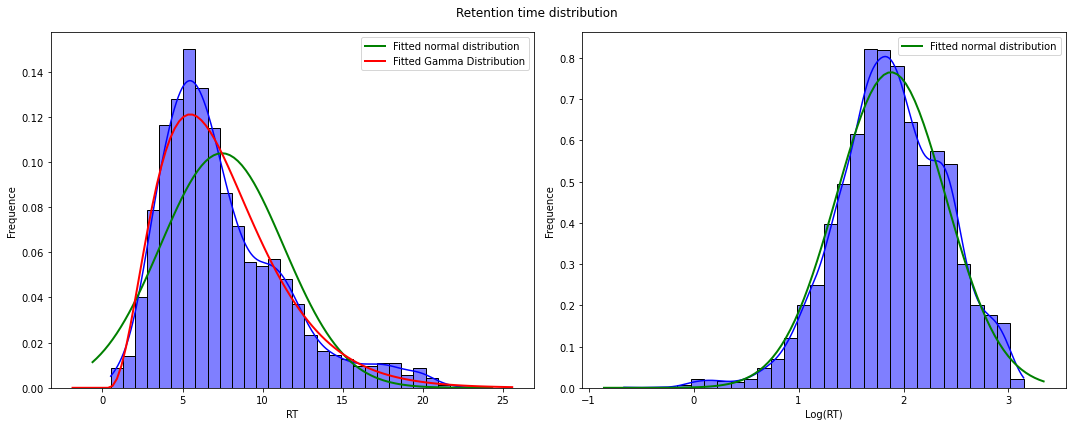

In [11]:
#VISUALIZATION
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0] = sns.histplot(train['RT'], bins=30, kde=True, color='blue', stat='density', ax=axs[0])
mu, std = norm.fit(train['RT'])
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[0].plot(x, p, c = "g", linewidth=2, label = "Fitted normal distribution")
axs[0].set_xlabel('RT')
axs[0].set_ylabel('Frequence')
alpha, loc, beta = gamma.fit(train['RT'])
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, alpha, loc, beta)
axs[0].plot(x, p, linewidth=2, label='Fitted Gamma Distribution', color = "red")
axs[0].legend()
axs[1] = sns.histplot(np.log(train['RT']), bins=30, kde=True, color='blue', stat='density', ax=axs[1])
axs[1].set_xlabel('Log(RT)')
axs[1].set_ylabel('Frequence')
axs[1].legend()
fig.suptitle('Retention time distribution')
mu, std = norm.fit(np.log(train['RT']))
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1].plot(x, p, c="g", linewidth=2, label = "Fitted normal distribution")
axs[1].legend()
plt.tight_layout()
plt.show()


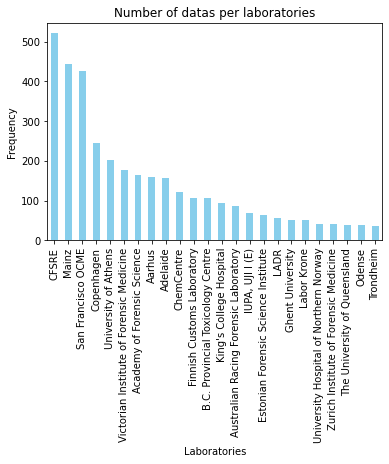

In [12]:
plt.figure()
lab_counts = train['Lab'].value_counts()
lab_counts.plot(kind='bar', color='skyblue')
plt.title('Number of datas per laboratories')
plt.xlabel("Laboratories")
plt.ylabel("Frequency")
plt.show()

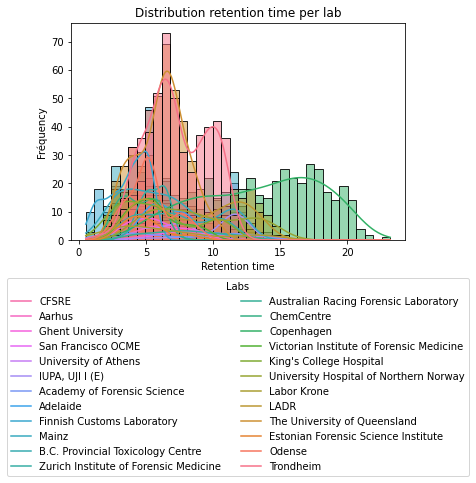

In [13]:
sns.histplot(data=train, x='RT', hue='Lab', kde=True)
plt.title('Distribution retention time per lab')
plt.xlabel('Retention time')
plt.ylabel('Fréquency')
plt.legend(title='Labs', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, labels=train['Lab'].unique())  
plt.show()

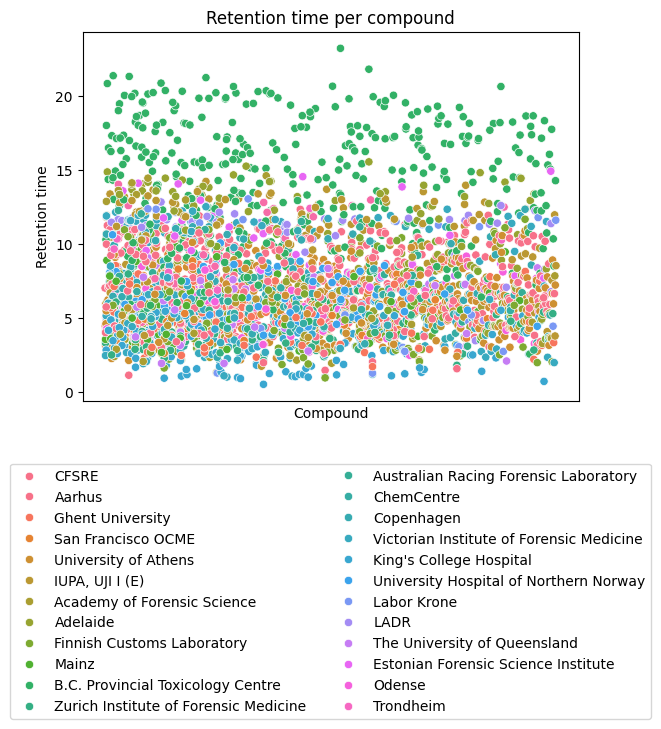

In [10]:
sns.scatterplot(data=train, x='Compound', y='RT', hue='Lab')
plt.title('Retention time per compound')
plt.xlabel('Compound')
plt.ylabel('Retention time')
plt.xticks([])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, labels=train['Lab'].unique()) 
plt.show()
